In [21]:
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
X = pd.read_csv("data/processed/marketing_campaign_final.csv")
X = X.drop(columns='ID')

#### k-distance plot

1. Fixer `min_samples`
Règle empirique :
$$ \text{min\_samples} \geq \text{dim} + 1 $$

Donc, pour un dataset de 10 colonnes → essayer min_samples = 10, puis ajuster
Augmenter un peu si bruit important

2. Trouver le meilleur `eps` avec un `k-distance` `plot`

- Chercher l'“épaule” (le coude) dans la courbe.

- La valeur de `eps` est souvent celle où la courbe commence à monter fortement.

📌 C’est le même principe que l’“elbow method” pour le K-means.



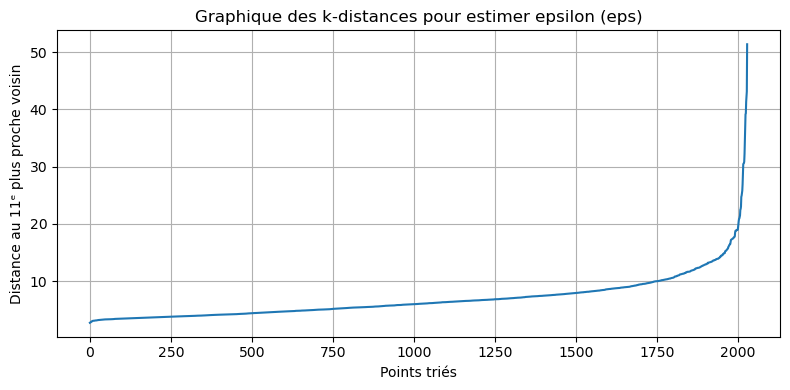

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


min_samples = 11
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# On prend la distance au k-ième plus proche voisin
k_distances = np.sort(distances[:, -1])  # la colonne -1 = la plus grande distance pour chaque point

# Tracé du k-distance plot
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.xlabel("Points triés")
plt.ylabel(f"Distance au {min_samples}ᵉ plus proche voisin")
plt.title("Graphique des k-distances pour estimer epsilon (eps)")
plt.grid(True)
plt.tight_layout()



#### Modélisation

In [81]:

model = DBSCAN(eps=5, min_samples=11)
labels = model.fit_predict(X)

X['cluster'] = labels


- `.fit()`, les labels sont stockés dans l’attribut `.labels_`

- `.fit_predict(X)` fait la même chose que `.fit(X)` et retourne directement les labels (`model.labels_`)

In [51]:
X.columns

Index(['PC1', 'PC2', 'PC3', 'Age', 'Income', 'Total_Spending', 'Has_Children',
       'Customer_Seniority', 'clusters', 'cluster'],
      dtype='object')

### Affichage 2 D

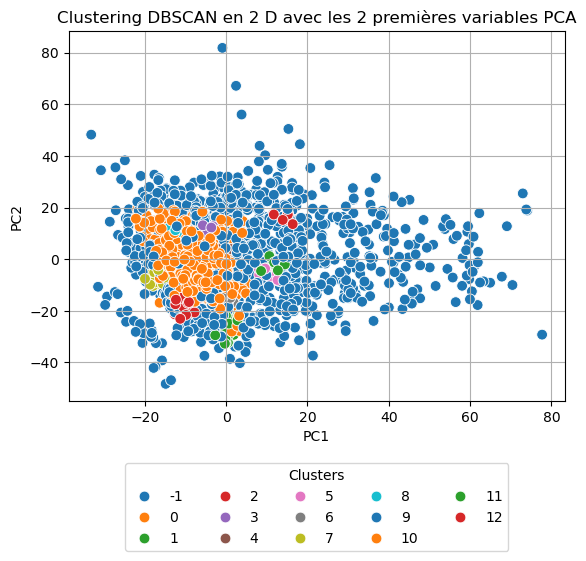

In [82]:
sns.scatterplot(
    data=X,
    x='PC1', y='PC2',
    hue='cluster',
    palette='tab10',
    s=60
)
plt.title("Clustering DBSCAN en 2 D avec les 2 premières variables PCA")
plt.grid(True)
plt.legend(
    title="Clusters",
    bbox_to_anchor=(0.5,-0.15),
    loc='upper center',
    ncol=5,
    frameon=True
)

### Affichage 3 D

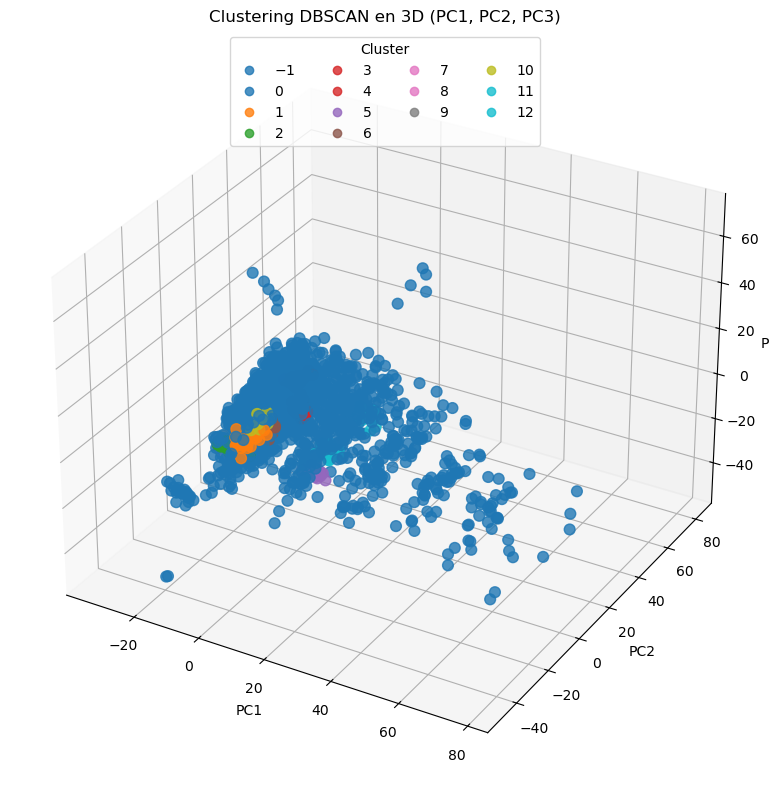

In [83]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D avec couleur selon cluster
scatter = ax.scatter(
    X['PC1'], X['PC2'], X['PC3'],
    c=X['cluster'],  # coloration par cluster
    cmap='tab10',
    s=60,
    alpha=0.8
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Clustering DBSCAN en 3D (PC1, PC2, PC3)")

# Création de la légende
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Cluster", loc='upper center', ncol=4)

plt.tight_layout()

In [84]:
import plotly.express as px

fig = px.scatter_3d(
    X, x='PC1', y='PC2', z='PC3',
    color='cluster',
    title="Clustering DBSCAN en 3D",
    symbol='cluster'
)
fig.show()


In [33]:
labels = model.labels_
# labels.shape
labels

array([-1, -1,  0, ..., -1,  0, -1], dtype=int64)